# Q3: Who are most likely to cause traffic accidents?

**Objective：Analysing the impact of driver and vehicle? characteristics on crash severity and identifying high-risk features**

* Dependent Variables：accident_severity(from collision) 
* Independent Variables：
    - driver features：sex_of_driver、age_of_driver、driver_imd_decile
    - vehicle features：vehicle_type、vehicle_reference。
* mian dataset: dft-road-casualty-statistics-vehicle-2023.csv
* other dataset: dft-road-casualty-statistics-collision-2023.csv

In [10]:
import pandas as pd
import numpy as np

import sklearn

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import seaborn as sn

import os
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [11]:
# merge data
# define output path

# 定义输入文件列表
files = ['data/dft-road-casualty-statistics-vehicle-2021.csv',
         'data/dft-road-casualty-statistics-vehicle-2022.csv',
         'data/dft-road-casualty-statistics-vehicle-2023.csv']
output_file = 'data/Q3/merged_vehicle.csv'

files2 = ['data/dft-road-casualty-statistics-collision-2021.csv',
         'data/dft-road-casualty-statistics-collision-2022.csv',
         'data/dft-road-casualty-statistics-collision-2023.csv']
output_file2 = 'data/Q3/merged_collision.csv'

os.makedirs(os.path.dirname(output_file), exist_ok=True)
os.makedirs(os.path.dirname(output_file2), exist_ok=True)

# define functions to read and merge block by block
def merge_large_csv(files, output_file, chunksize=10000):
    """
    将多个大型 CSV 文件逐块读取并合并，写入到一个新文件中。
    
    参数：
    - files: 需要合并的 CSV 文件路径列表。
    - output_file: 合并后的输出文件路径。
    - chunksize: 每次读取的行数。
    """
    # controls whether or not the table header is written
    is_first_chunk = True

    for file in files:
        print(f"Processing {file}...")
        # 逐块读取文件
        for chunk in pd.read_csv(file, chunksize=chunksize):
            # 逐块写入输出文件
            chunk.to_csv(output_file, mode='a', index=False, header=is_first_chunk)
            is_first_chunk = False  # 只有第一个文件写入表头
    print(f"All files have been merged into {output_file}")

In [12]:
# calling a function to merge
merge_large_csv(files, output_file)
merged_vehicle = pd.read_csv('data/Q3/merged_vehicle.csv')

Processing data/dft-road-casualty-statistics-vehicle-2021.csv...
Processing data/dft-road-casualty-statistics-vehicle-2022.csv...
Processing data/dft-road-casualty-statistics-vehicle-2023.csv...
All files have been merged into data/Q3/merged_vehicle.csv


/tmp/ipykernel_23918/720717651.py:3: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_vehicle = pd.read_csv('data/Q3/merged_vehicle.csv')


In [13]:
# calling a function to merge
merge_large_csv(files2, output_file2)
merged_collision = pd.read_csv('data/Q3/merged_collision.csv')

Processing data/dft-road-casualty-statistics-collision-2021.csv...
Processing data/dft-road-casualty-statistics-collision-2022.csv...
Processing data/dft-road-casualty-statistics-collision-2023.csv...
All files have been merged into data/Q3/merged_collision.csv


/tmp/ipykernel_23918/1755806851.py:3: DtypeWarning: Columns (0,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_collision = pd.read_csv('data/Q3/merged_collision.csv')


In [16]:
# Select the columns of interest for analysis
columns_of_interest = [
    'accident_index', 'sex_of_driver', 'age_of_driver','driver_imd_decile']

vehicle_data_selected = merged_vehicle[columns_of_interest]
# Saving the selected data to a local CSV file
vehicle_data_selected.to_csv('data/Q3/vehicle_data_selected.csv', index=False)
print("ok")

ok


In [17]:
columns_of_interest2 = ['accident_index', 'accident_severity']

collision_data_selected = merged_collision[columns_of_interest2]
# Saving the selected data to a local CSV file
collision_data_selected.to_csv('data/Q3/collision_data_selected.csv', index=False)
print("ok")

ok


In [18]:
# 文件路径
file1 = 'data/Q3/vehicle_data_selected.csv'
file2 = 'data/Q3/collision_data_selected.csv'
output_path = 'data/Q3/merged_output.csv'

dtype_dict = {0: 'str'}

# 定义读取的块大小
chunk_size = 10000  # 根据内存大小调整

# 创建一个写入器，先写入表头
with open(output_path, 'w') as output_file:
    first_chunk = True  # 标记是否是第一个分块
    for chunk_csv1 in pd.read_csv(file1, dtype=dtype_dict,chunksize=chunk_size):
        # 读取 csv2
        chunk_csv2 = pd.read_csv(file2, dtype=dtype_dict)

        # 合并当前块与csv2
        merged_chunk = pd.merge(chunk_csv1, chunk_csv2, on='accident_index', how='inner')

        # 写入合并结果，保留表头
        merged_chunk.to_csv(output_file, index=False, header=first_chunk, mode='a')
        first_chunk = False  # 之后的分块不需要重复写入表头

print(f"合并完成，结果已保存到 {output_path}")

合并完成，结果已保存到 data/Q3/merged_output.csv


In [19]:
# 替换所有可能的占位符为 NaN
merged_output = pd.read_csv('data/Q3/merged_output.csv')
merged_output.replace(["", " ", -1], pd.NA, inplace=True)
filtered_data = merged_output[merged_output['sex_of_driver'] != 3]

print(merged_output.isin([-1]).sum())  # 检查每列中是否仍然存在 -1
# 再次删除 NaN
cleaned_data = merged_output.dropna()

cleaned_file_path = 'data/Q3/cleaned_data.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)
cleaned_data

accident_index       0
sex_of_driver        0
age_of_driver        0
driver_imd_decile    0
accident_severity    0
dtype: int64


,accident_index,sex_of_driver,age_of_driver,driver_imd_decile,accident_severity
0,2021010287148,1,19,10,3
4,2021010287149,1,21,3,2
5,2021010287151,1,27,2,2
6,2021010287151,1,27,2,2
8,2021010287157,1,37,3,3
...,...,...,...,...,...
569794,2023991451985,1,37,10,3
569795,2023991452286,2,34,3,2
569798,2023991453360,1,19,10,3
569799,2023991453360,1,21,7,3


In [20]:
# For demonstration, create a feature that categorizes age into broader groups
def categorize_age(age):
    if 0 <= age < 18:
        return '0-17'
    elif 18 <= age <= 29:
        return '18-29'
    elif 30 <= age <= 59:
        return '30-59'
    elif 60 <= age <= 69:
        return '60-69'
    else:
        return '70+'

# 添加新的年龄分类列
cleaned_data['age_category'] = cleaned_data['age_of_driver'].apply(categorize_age)

# 定义自定义的年龄类别顺序
age_category_order = ['0-17', '18-29', '30-59', '60-69', '70+']

# 按顺序分配编码
category_to_code = {category: code for code, category in enumerate(age_category_order)}

# 应用自定义编码
cleaned_data['age_category_encoded'] = cleaned_data['age_category'].map(category_to_code)

# 查看结果
print("自定义类别编码映射：")
print(category_to_code)

print("\nDataframe 信息：")
print(cleaned_data.info())

print("\n带有自定义编码的前几行数据：")
cleaned_data.head()

自定义类别编码映射：
{'0-17': 0, '18-29': 1, '30-59': 2, '60-69': 3, '70+': 4}

Dataframe 信息：
<class 'pandas.core.frame.DataFrame'>
Index: 438625 entries, 0 to 569800
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   accident_index        438625 non-null  object
 1   sex_of_driver         438625 non-null  object
 2   age_of_driver         438625 non-null  object
 3   driver_imd_decile     438625 non-null  object
 4   accident_severity     438625 non-null  int64 
 5   age_category          438625 non-null  object
 6   age_category_encoded  438625 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 26.8+ MB
None

带有自定义编码的前几行数据：


/tmp/ipykernel_23918/2379451277.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['age_category'] = cleaned_data['age_of_driver'].apply(categorize_age)
/tmp/ipykernel_23918/2379451277.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['age_category_encoded'] = cleaned_data['age_category'].map(category_to_code)


,accident_index,sex_of_driver,age_of_driver,driver_imd_decile,accident_severity,age_category,age_category_encoded
0,2021010287148,1,19,10,3,18-29,1
4,2021010287149,1,21,3,2,18-29,1
5,2021010287151,1,27,2,2,18-29,1
6,2021010287151,1,27,2,2,18-29,1
8,2021010287157,1,37,3,3,30-59,2


In [25]:
# 替换所有可能的占位符为 NaN
cleaned_data.replace(["", " ", -1], pd.NA, inplace=True)
cleaned_data = cleaned_data[cleaned_data['sex_of_driver'] != 3]

print(cleaned_data.isin([-1]).sum())  # 检查每列中是否仍然存在 -1
# 再次删除 NaN
cleaned_data = cleaned_data.dropna()

cleaned_file_path = 'data/Q3/cleaned_data.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)
cleaned_data

accident_index          0
sex_of_driver           0
age_of_driver           0
driver_imd_decile       0
accident_severity       0
age_category            0
age_category_encoded    0
dtype: int64


,accident_index,sex_of_driver,age_of_driver,driver_imd_decile,accident_severity,age_category,age_category_encoded
0,2021010287148,1,19,10,3,18-29,1
4,2021010287149,1,21,3,2,18-29,1
5,2021010287151,1,27,2,2,18-29,1
6,2021010287151,1,27,2,2,18-29,1
8,2021010287157,1,37,3,3,30-59,2
...,...,...,...,...,...,...,...
569794,2023991451985,1,37,10,3,30-59,2
569795,2023991452286,2,34,3,2,30-59,2
569798,2023991453360,1,19,10,3,18-29,1
569799,2023991453360,1,21,7,3,18-29,1


In [26]:
# 定义目标变量和独立变量
target_var = 'accident_severity'
independent_vars = ['sex_of_driver', 'age_category','driver_imd_decile']

# 存储结果
results = []

# 对每个独立变量进行卡方检验
for var in independent_vars:
    # 创建列联表
    contingency_table = pd.crosstab(cleaned_data[target_var], cleaned_data[var])
    
    # 执行卡方检验
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # 保存结果
    results.append({
        'Variable': var,
        'Chi2': chi2,
        'P-value': p,
        'Degrees of Freedom': dof
    })

# 转换为 DataFrame 格式输出
results_df = pd.DataFrame(results)
print(results_df)

            Variable         Chi2        P-value  Degrees of Freedom
0      sex_of_driver  1590.264735   0.000000e+00                   2
1       age_category  1286.242437  2.211863e-272                   8
2  driver_imd_decile   449.817829   3.543957e-84                  18


In [27]:
results_df = results_df.apply(pd.to_numeric, errors='coerce')

# Cramér's V 计算函数
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * dof))

# 迭代计算每个变量的 Cramér's V
results_df["Cramers_V"] = results_df.apply(
    lambda row: cramers_v(row["Chi2"], n=10000, dof=row["Degrees of Freedom"]), axis=1
)

# 输出结果
print(results_df)

   Variable         Chi2        P-value  Degrees of Freedom  Cramers_V
0       NaN  1590.264735   0.000000e+00                   2   0.281981
1       NaN  1286.242437  2.211863e-272                   8   0.126799
2       NaN   449.817829   3.543957e-84                  18   0.049990


In [34]:
# Map the 'sex_of_driver' values to 'M' and 'F'
gender_mapping = {1: 'M', 2: 'F'}
cleaned_data['sex_of_driver'] = cleaned_data['sex_of_driver'].map(gender_mapping)

# 通过字符串拼接将年龄段和性别组合
cleaned_data['age_gender_combination'] = cleaned_data['age_category'] + "*" + cleaned_data['sex_of_driver'].astype(str)

# 查看数据结果
cleaned_data[['age_category', 'sex_of_driver', 'age_gender_combination']].head()

,age_category,sex_of_driver,age_gender_combination
0,18-29,M,18-29*M
4,18-29,M,18-29*M
5,18-29,M,18-29*M
6,18-29,M,18-29*M
8,30-59,M,30-59*M


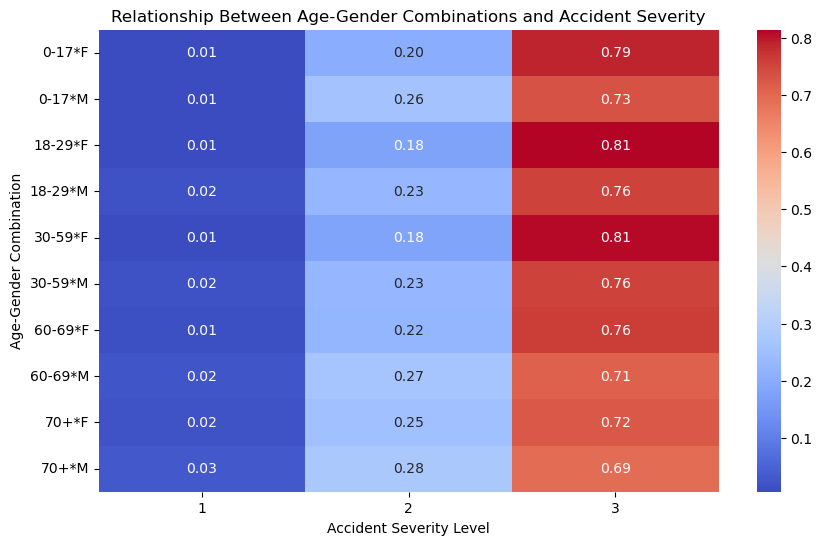

In [35]:
# Create a contingency table for age_gender_combination and accident_severity
age_gender_severity_table = cleaned_data.pivot_table(
    index='age_gender_combination',
    columns='accident_severity',
    values='accident_index',
    aggfunc='count',
    fill_value=0
)

# Normalize the table by rows to calculate proportions for each severity level
age_gender_severity_normalized = age_gender_severity_table.div(
    age_gender_severity_table.sum(axis=1), axis=0
)

# Plotting the heatmap to show the relationship
plt.figure(figsize=(10, 6))
sn.heatmap(age_gender_severity_normalized, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Relationship Between Age-Gender Combinations and Accident Severity")
plt.xlabel("Accident Severity Level")
plt.ylabel("Age-Gender Combination")
plt.show()

In [ ]:
# cleaned_vehicle['sex_of_driver'].unique()

In [ ]:
# cleaned_vehicle['age_band_of_driver'].unique()

In [ ]:
# cleaned_vehicle['driver_imd_decile'].unique()

In [ ]:
# cleaned_vehicle['vehicle_type'].unique()